In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
rating_db = create_engine('sqlite:///rating.db')

In [3]:
%%time
chunk_size = 100000
x = 0
y = 1
for data_f in pd.read_csv('ratings_27M.csv', chunksize=chunk_size, iterator=True):
      data_f = data_f.rename(columns={c: c.replace(' ', '') for c in data_f.columns}) 
      data_f.index += y
      x+=1
      data_f.to_sql('tab', rating_db, if_exists='append')
      y = data_f.index[-1] + 1
print("loading to sql_DB")

loading to sql_DB
Wall time: 9min 28s


In [4]:
%%time
zero5 = pd.read_sql_query('SELECT rating FROM tab where rating=0.5', rating_db)
one = pd.read_sql_query('SELECT rating FROM tab where rating=1.0', rating_db)
one5 = pd.read_sql_query('SELECT rating FROM tab where rating=1.5', rating_db)
two = pd.read_sql_query('SELECT rating FROM tab where rating=2.0', rating_db)
two5 = pd.read_sql_query('SELECT rating FROM tab where rating=2.5', rating_db)
three = pd.read_sql_query('SELECT rating FROM tab where rating=3.0', rating_db)
three5 = pd.read_sql_query('SELECT rating FROM tab where rating=3.5', rating_db)
four = pd.read_sql_query('SELECT rating FROM tab where rating=4.0', rating_db)
four5 = pd.read_sql_query('SELECT rating FROM tab where rating=4.5', rating_db)
five = pd.read_sql_query('SELECT rating FROM tab where rating=5.0', rating_db)

Wall time: 2min 57s


In [5]:
y_axis = [len(zero5), len(one), len(one5), len(two), len(two5), len(three), 
          len(three5), len(four), len(four5), len(five)]
x_axis = []
x = range(0,10)
for a in range(1,11):
    x_axis.append(a/2)

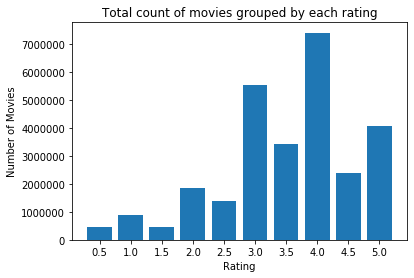

In [6]:
plt.xticks(x,x_axis)
plt.bar(x,y_axis)
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Total count of movies grouped by each rating")
plt.show()

In [7]:
# Number of movies with rating 4 and above

In [ ]:
moviesCSV = pd.read_csv('movies_60K.csv')

In [65]:
%%time
HRM = pd.read_sql_query('select movieId from tab where rating=4.0 or rating=4.5 or rating=5',rating_db)

Wall time: 1min 21s


In [66]:
HRM_list = HRM.values.tolist()

In [67]:
HRM_l = []
for sublist in HRM_list:
    for element in sublist:
        HRM_l.append(element)

In [68]:
mId = list(dict.fromkeys(HRM_l))
mId.sort()

In [ ]:
len(mId)

In [69]:
y1=0
year = []
no_year = 0
for x1 in range(len(moviesCSV)) : 
    if moviesCSV.movieId[x1] == mId[y1] :  
        y1 +=1
        title = moviesCSV.title[x1]
        yr = title.split('(')[-1]
        a = yr[0:4]
        if a.isdigit() :
            year.append(a)
        else : 
            no_year += 1

In [70]:
tens = 0
aughts = 0
ninties = 0
eighties = 0
seventies = 0
sixties = 0
fifties = 0
forties = 0
thirties = 0
twenties = 0

In [71]:
for x in range(len(year)):
    if int(year[x])>2010 and int(year[x])<2021 :
        tens +=1
    elif int(year[x])>2000 and int(year[x])<2011 :
        aughts +=1
    elif int(year[x])>1990 and int(year[x])<2001 :
        ninties +=1
    elif int(year[x])>1980 and int(year[x])<1991 :
        eighties +=1
    elif int(year[x])>1970 and int(year[x])<1981 :
        seventies +=1
    elif int(year[x])>1960 and int(year[x])<1971 :
        sixties +=1
    elif int(year[x])>1950 and int(year[x])<1961 :
        fifties +=1
    elif int(year[x])>1940 and int(year[x])<1951 :
        forties +=1
    elif int(year[x])>1930 and int(year[x])<1941 :
        thirties +=1
    elif int(year[x])>1920 and int(year[x])<1931 :
        twenties +=1

In [79]:
count = [twenties,thirties,forties,fifties,sixties,seventies,eighties,ninties,aughts,tens]
x_a = [] 
for x2 in range(192,202) :
    x_a.append(x2*10)

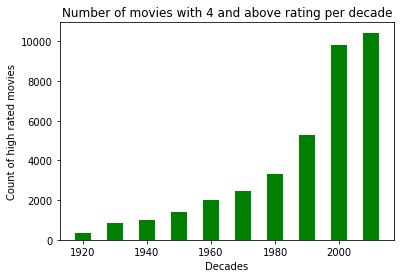

In [82]:
plt.bar(x_a,count,color='green',width=5)
plt.xlabel("Decades")
plt.ylabel("Count of high rated movies")
plt.title("Number of movies with 4 and above rating per decade")
plt.show()

In [83]:
# % of movies within each genre which are rated 4 and above

In [90]:
Action = 0
Adventure = 0
Animation = 0
Childrens = 0
Comedy = 0
Crime = 0
Documentary = 0
Drama = 0
Fantasy = 0
FilmNoir = 0
Horror = 0
IMAX = 0
Musical = 0
Mystery = 0
Romance = 0
SciFi = 0
Thriller = 0
War = 0
Western = 0
unspecified = 0

In [91]:
genres = moviesCSV.genres
for x in range(len(genres)) :
    g = genres[x].split('|')
    for y in range(len(g)) :
        if g[y]=="Action" : 
            Action +=1  
        elif g[y]=="Adventure" :
            Adventure +=1
        elif g[y]=="Animation" :
            Animation +=1
        elif g[y]=="Children" :
            Childrens +=1
        elif g[y]=="Comedy" :
            Comedy +=1
        elif g[y]=="Crime" :
            Crime +=1
        elif g[y]=="Documentary" :
            Documentary +=1
        elif g[y]=="Drama" :
            Drama +=1
        elif g[y]=="Fantasy" :
            Fantasy +=1
        elif g[y]=="Film-Noir" :
            FilmNoir +=1
        elif g[y]=="Horror" :
            Horror +=1
        elif g[y]=="IMAX" :
            IMAX +=1
        elif g[y]=="Musical" :
            Musical +=1
        elif g[y]=="Mystery" :
            Mystery +=1
        elif g[y]=="Romance" :
            Romance +=1
        elif g[y]=="Sci-Fi" :
            SciFi +=1
        elif g[y]=="Thriller" :
            Thriller +=1
        elif g[y]=="War" :
            War +=1
        elif g[y]=="Western" :
            Western +=1
        else :
            unspecified +=1

movieCount=[Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,
            FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,unspecified]

In [92]:
z=0
genres = []
for x in range(len(moviesCSV)) :
    if moviesCSV.movieId[x] == mId[z] :
        z+=1
        genre = moviesCSV.genres[x]
        g = genre.split('|')
        for y in range(len(g)) :
            genres.append(g[y])

In [97]:
a = [genres.count("Action"),genres.count("Adventure"),genres.count("Animation"),genres.count("Children"),
          genres.count("Comedy"),genres.count("Crime"),genres.count("Documentary"),genres.count("Drama"),
          genres.count("Fantasy"),genres.count("Film-Noir"),genres.count("Horror"),genres.count("IMAX"),genres.count("Musical"),
          genres.count("Mystery"),genres.count("Romance"),genres.count("Sci-Fi"),genres.count("Thriller"),
          genres.count("War"),genres.count("Western"),genres.count("(no genres listed)")]
Y1 = []
for x in range(len(a)) :
    Y1.append(a[x]/movieCount[x]*100)

In [98]:
X1 = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
          'Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','(no genres listed)']

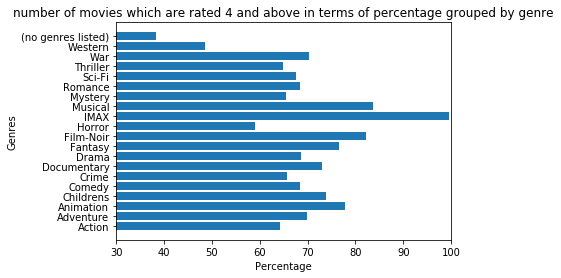

In [107]:
plt.barh(X1,Y1)
plt.xlim(30,100)
plt.xlabel("Percentage")
plt.ylabel("Genres")
plt.title("number of movies which are rated 4 and above in terms of percentage grouped by genre")
plt.show()
#number of movies which are rated 4 and above in terms of percentage grouped by genres